In [5]:
import pandas as pd

arquivo = "/Users/alexandrethadeu/Documents/Python/covid_dataframe/dados/covid.csv"
covid_df = pd.read_csv(arquivo, sep=";", engine="python")


In [6]:
# Dados
tipos_dados = pd.DataFrame(covid_df.dtypes, columns=["Tipo de Dado"])
tipos_dados.columns.name = 'Variavel'
tipos_dados


Variavel,Tipo de Dado
cd_ibge,int64
municipio,object
gde_regiao,object
mes,object
casos_novos,int64
pop,int64
pop_60,int64
obitos,int64
area,int64


In [7]:
# Shape
shape_obs = covid_df.shape[0]  # obs
shape_variavel = covid_df.shape[1]  # variaveis
print(
    f'A base de dados apresenta {shape_obs} observações e {shape_variavel} variaveis')


A base de dados apresenta 5805 observações e 9 variaveis


In [8]:
# Dez primeiras obs
covid_head = covid_df.head(10)
covid_head


,cd_ibge,municipio,gde_regiao,mes,casos_novos,pop,pop_60,obitos,area
0,3500105,Adamantina,Interior,Fevereiro,0,33894,7398,0,41199
1,3500204,Adolfo,Interior,Fevereiro,0,3447,761,0,21106
2,3500303,Aguaí,Interior,Fevereiro,0,35608,5245,0,47455
3,3500402,Águas da Prata,Interior,Fevereiro,0,7797,1729,0,14267
4,3500501,Águas de Lindóia,Interior,Fevereiro,0,18374,3275,0,6013
5,3500550,Águas de Santa Bárbara,Interior,Fevereiro,0,5931,1106,0,40446
6,3500600,Águas de São Pedro,Interior,Fevereiro,0,3122,764,0,361
7,3500709,Agudos,Interior,Fevereiro,0,36134,5524,0,96671
8,3500758,Alambari,Interior,Fevereiro,0,5779,830,0,1596
9,3500808,Alfredo Marcondes,Interior,Fevereiro,0,3927,907,0,11892


In [10]:
# Casos e Obitos
total_obitos = covid_df['obitos'].sum()
total_casos = covid_df['casos_novos'].sum()
info = {
    'Casos': [total_casos],
    'Obitos': [total_obitos]
}
data = pd.DataFrame(info)
data


,Casos,Obitos
0,1016571,36669


In [11]:
# Agrupando por municipios
group_municipio = covid_df.groupby('municipio')
total_obitos = group_municipio['obitos'].sum()
obitos_df = pd.DataFrame(total_obitos)
obitos_df.sort_values(['obitos'], ascending=False).head(10)

# Somando total de casos
total_casos = group_municipio['casos_novos'].sum()
casos_df = pd.DataFrame(total_casos)
casos_df.sort_values(['casos_novos'], ascending=False).head(10)

# Criado o df2 como covid_resume e adicionando letalidade
covid_resume = casos_df
covid_resume['obitos'] = obitos_df['obitos']
covid_resume['letalidade'] = covid_resume['obitos'] / \
    covid_resume['casos_novos']
covid_resume['letalidade'] = covid_resume['letalidade']
covid_resume.sort_values(['letalidade'], ascending=False).head(10)


,casos_novos,obitos,letalidade
municipio,,,
São Luiz do Paraitinga,17,5,0.294118
Álvaro de Carvalho,17,4,0.235294
Arapeí,6,1,0.166667
Gabriel Monteiro,25,4,0.160000
Gastão Vidigal,79,12,0.151899
Sabino,45,6,0.133333
Santa Mercedes,8,1,0.125000
Torre de Pedra,18,2,0.111111
Riversul,19,2,0.105263


In [12]:
# Agrupando um df para populacao
total_habitantes_df = pd.DataFrame(group_municipio['pop'].last())

# Adicionando no df2 casos_pc e obitos_pc
covid_resume['pop'] = total_habitantes_df['pop']
covid_resume['casos_pc'] = (
    covid_resume['casos_novos'] / covid_resume['pop']) * 100000
covid_resume['obitos_pc'] = (
    covid_resume['obitos'] / covid_resume['pop']) * 100000
covid_resume['casos_pc'] = covid_resume['casos_pc'].round()
covid_resume['obitos_pc'] = covid_resume['obitos_pc'].round()
covid_resume.sort_values(['obitos_pc'], ascending=False).head(10)


,casos_novos,obitos,letalidade,pop,casos_pc,obitos_pc
municipio,,,,,,
Cosmorama,282,18,0.063830,6997,4030.0,257.0
Gastão Vidigal,79,12,0.151899,4768,1657.0,252.0
Bálsamo,514,21,0.040856,8524,6030.0,246.0
Dolcinópolis,75,5,0.066667,2040,3676.0,245.0
Mendonça,172,10,0.058140,5043,3411.0,198.0
Américo de Campos,309,10,0.032362,5736,5387.0,174.0
Nova Castilho,21,2,0.095238,1176,1786.0,170.0
Uru,60,2,0.033333,1207,4971.0,166.0
São João de Iracema,44,3,0.068182,1850,2378.0,162.0


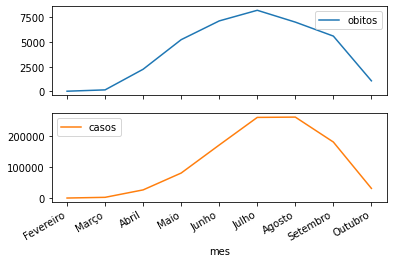

In [13]:
# Agrupando casos e obitos por mes e montando grafico em linha da evoulacao
group_meses = covid_df.groupby('mes')
casos_mes_df = pd.DataFrame(group_meses['casos_novos'].sum())
casos_mes_df.sort_values(['casos_novos'], ascending=True)
obitos_mes_df = pd.DataFrame(group_meses['obitos'].sum())
obitos_mes_df.sort_values(['obitos'], ascending=True)
obitos_mes_df['casos'] = casos_mes_df['casos_novos']
obitos_mes_df = obitos_mes_df.reindex(['Fevereiro', 'Março', 'Abril', 'Maio',
                                       'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro'])
obitos_mes_df
lines = obitos_mes_df.plot.line(subplots=True)


In [14]:
# Agrupando região para montar quantos municipios ha em cada regiao
covid_df2 = covid_df.drop_duplicates(['municipio'])
group_regiao = covid_df2.groupby('gde_regiao')
regiao_df = pd.DataFrame(group_regiao['municipio'].size())
regiao_df

# Adicionando densidade ao df2
area_df = pd.DataFrame(group_municipio['area'].last())
covid_resume['densidade'] = total_habitantes_df['pop'] / area_df['area']
covid_resume.sort_values(['densidade'], ascending=False).head(15)


,casos_novos,obitos,letalidade,pop,casos_pc,obitos_pc,densidade
municipio,,,,,,,
Francisco Morato,2848,133,0.046699,174403,1633.0,76.0,3559.244898
Taubaté,5001,135,0.026995,307361,1627.0,44.0,491.777600
Barueri,6719,374,0.055663,264390,2541.0,141.0,402.420091
Embu das Artes,3573,177,0.049538,270790,1319.0,65.0,384.644886
São Vicente,6916,419,0.060584,357929,1932.0,117.0,241.680621
Pindamonhangaba,2291,44,0.019206,163611,1400.0,27.0,224.124658
Taboão da Serra,6944,287,0.041331,283871,2446.0,101.0,139.220696
Diadema,8477,365,0.043058,404477,2096.0,90.0,131.622844
Carapicuíba,7828,351,0.044839,394598,1984.0,89.0,114.210709


In [16]:
# Agrupando região para montar quantos municipios ha em cada regiao
covid_df2 = covid_df.drop_duplicates(['municipio'])
group_regiao = covid_df2.groupby('gde_regiao')
regiao_df = pd.DataFrame(group_regiao['municipio'].size())
regiao_df


,municipio
gde_regiao,
Capital,1
Interior,606
RMSP (exceto capital),38


<AxesSubplot:xlabel='regiao'>

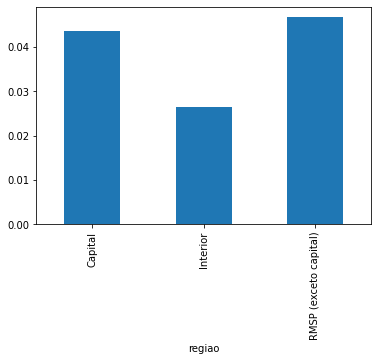

In [15]:
# Gráfico em barras para mostar a letalidade por região
covid_resume.sort_values(['densidade', 'casos_pc'], ascending=False).head(15)
municipios_regiao = pd.DataFrame(group_municipio['gde_regiao'].last())
municipios_regiao
covid_resume['regiao'] = municipios_regiao['gde_regiao']
df_bar = covid_resume.groupby(['regiao'])['letalidade'].mean()
bar = df_bar.plot.bar()
bar


In [20]:
total_habitantes_60_df = pd.DataFrame(group_municipio['pop_60'].last())
covid_resume['pop_60'] = total_habitantes_60_df['pop_60'].round()
covid_resume
covid_resume['idoso_pc'] = (
    covid_resume['pop_60'] / covid_resume['pop']) * 100000
covid_resume['idoso_pc'] = covid_resume['idoso_pc'].round()
covid_resume


,casos_novos,obitos,letalidade,pop,casos_pc,obitos_pc,densidade,regiao,pop_60,idoso_pc
municipio,,,,,,,,,,
Adamantina,386,11,0.028497,33894,1139.0,32.0,0.822690,Interior,7398,21827.0
Adolfo,116,4,0.034483,3447,3365.0,116.0,0.163318,Interior,761,22077.0
Aguaí,305,6,0.019672,35608,857.0,17.0,0.750353,Interior,5245,14730.0
Agudos,661,13,0.019667,36134,1829.0,36.0,0.373783,Interior,5524,15288.0
Alambari,72,1,0.013889,5779,1246.0,17.0,3.620927,Interior,830,14362.0
...,...,...,...,...,...,...,...,...,...,...
Águas de São Pedro,54,1,0.018519,3122,1730.0,32.0,8.648199,Interior,764,24471.0
Álvares Florence,62,4,0.064516,3621,1712.0,110.0,0.099914,Interior,991,27368.0
Álvares Machado,241,8,0.033195,23789,1013.0,34.0,0.684280,Interior,4267,17937.0


<AxesSubplot:xlabel='regiao'>

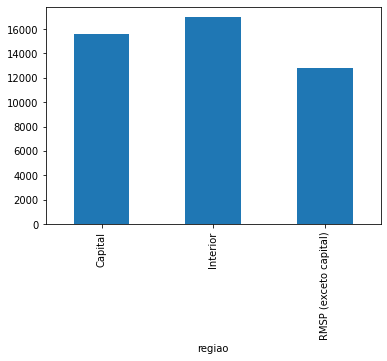

In [22]:
df_bar2 = covid_resume.groupby(['regiao'])['idoso_pc'].mean()
bar2 = df_bar2.plot.bar()
bar
